<a href="https://colab.research.google.com/github/qpdian/jupiter-notebooks/blob/master/Scholar_Papers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set the query:

In [0]:
query = '"machine learning" AND keratoconus'


# Get data:

#### Install the libraries and define methods

In [0]:
!pip install git+https://github.com/ouracademy/scholarly.git
import scholarly

In [0]:
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import json
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def show_word_cloud(source):
  stopwords = STOPWORDS
  wordcloud2 = WordCloud(
                      stopwords=stopwords,
                      background_color='white',
                      width=2000,
                      height=1400
                     ).generate(source)
  plt.figure( figsize =(15,6))
  plt.imshow(wordcloud2)
  plt.axis('off')
  
def show_n_first_group_by(source, field, field2,n):
  author_paper_count = source.groupby(field).count().sort_values(by=field2,ascending=False)
  author_paper_count = author_paper_count.rename(columns = {field2:'count'}).reset_index()
  top = author_paper_count.head(n)
  plt.figure( figsize =(18,6))
  top.plot(x=field,y ="count", kind='barh', alpha=0.55)

#### Get publication from Google Scholar

In [0]:

def get_publications(query):
  result_query = scholarly.search_pubs_query('machine learning')
  result = [ vars(x) for x in result_query]
  return result

publications = get_publications(query)




### Create dataframe

In [0]:
dataframe = json_normalize(publications)

dataframe.head()

# Prepare data

In [0]:
dataframe['index'] = dataframe.index
dataframe['authors'] = dataframe['bib.author'].transform(lambda x : x.split(' and '))
## create author_paper
author_paper = pd.melt(dataframe.authors.apply(pd.Series).reset_index(), 
        id_vars=['index'],
        value_name='author') \
        .drop('variable', axis=1) \
        .sort_values('index').rename(columns = {'index':'paper'})
author_paper = pd.merge(author_paper, dataframe[['index','bib.title','citedby']], left_on='paper', right_on='index')
dataframe['bib.abstract'] = dataframe['bib.abstract'].astype(str)


# Analize data

## Wordcloud for the titles and the abstracts

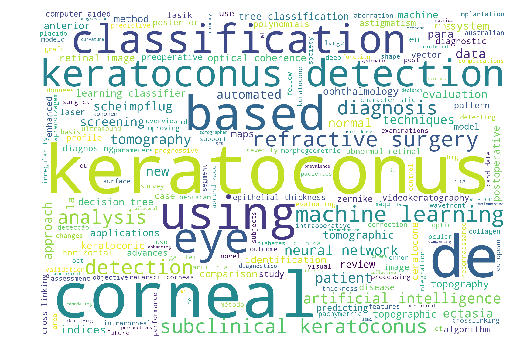

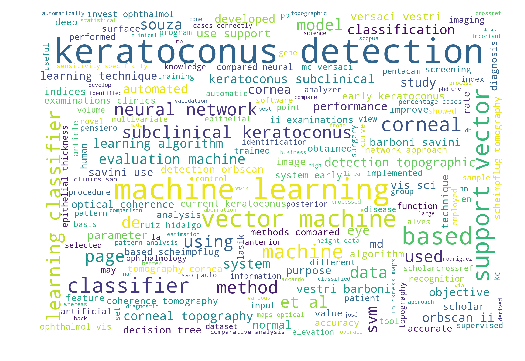

In [0]:
titles = " ".join(dataframe["bib.title"].str.lower())
show_word_cloud(titles)
abstracts = " ".join(dataframe["bib.abstract"].str.lower())
show_word_cloud(abstracts)

## Number papers by author

<Figure size 1296x432 with 0 Axes>

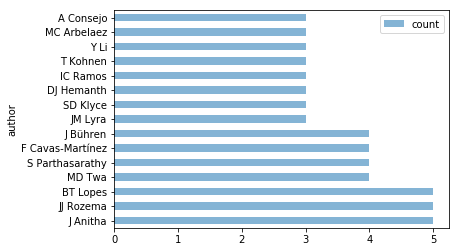

In [0]:
show_n_first_group_by(author_paper, 'author', 'paper', 15)




## Number authors by paper

<Figure size 1800x600 with 0 Axes>

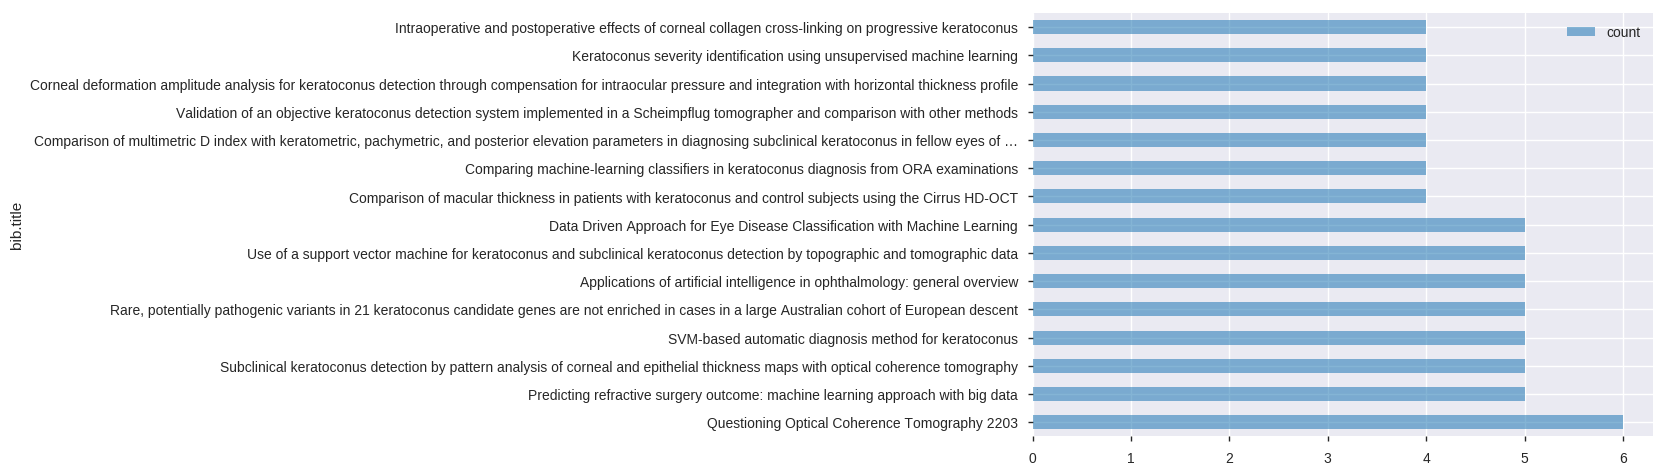

In [0]:
show_n_first_group_by(author_paper, 'bib.title', 'author', 15)

## Correlation

In [0]:
def get_N__by(source, field, field2):
  count = source.groupby(field).count().sort_values(by=field2,ascending=False)
  return count.rename(columns = {field2:'count'}).reset_index()

In [0]:
result = get_N__by(author_paper,'author','paper')
result.head()

,author,count,index,bib.title,citedby
0,J Anitha,5,5,5,5
1,JJ Rozema,5,5,5,5
2,BT Lopes,5,5,5,3
3,MD Twa,4,4,4,4
4,S Parthasarathy,4,4,4,4


In [0]:
n = pd.merge(author_paper, result[['author','count']], left_on='author', right_on='author')
n.head()

,paper,author,index,bib.title,citedby,count
0,0,MC Arbelaez,0,Use of a support vector machine for keratoconu...,90.0,3
1,12,MC Arbelaez,12,Screening for subclinical keratoconus,4.0,3
2,69,MC Arbelaez,69,"In summary, with the use of new technologies a...",NaN,3
3,0,G Vestri,0,Use of a support vector machine for keratoconu...,90.0,2
4,39,G Vestri,39,Instrumentation for Diagnosis of Keratoconus,1.0,2


In [0]:
count = n[['index','count']].groupby('index').sum()
count.head()

,count
index,
0,9
1,5
2,9
3,6
4,4


In [0]:
n2 = pd.merge(dataframe, count, left_on='index', right_on='index')
n2.head()

,_filled,bib.abstract,bib.author,bib.eprint,bib.title,bib.url,citedby,id_scholarcitedby,source,url_scholarbib,index,authors,count
0,False,… machine for each pair of classes resulting i...,MC Arbelaez and F Versaci and G Vestri and P B...,http://s499648585.mialojamiento.es/biblioteca/...,Use of a support vector machine for keratoconu...,https://www.sciencedirect.com/science/article/...,90.0,5495018767052498476,scholar,https://scholar.googleusercontent.com/scholar....,0,"[MC Arbelaez, F Versaci, G Vestri, P Barboni, ...",9
1,False,PURPOSE: To evaluate the performance of suppor...,MB Souza and FW Medeiros and DB Souza and R Ga...,http://www.scielo.br/scielo.php?pid=S1807-5932...,Evaluation of machine learning classifiers in ...,http://www.scielo.br/scielo.php?pid=S1807-5932...,29.0,9619090188707270001,scholar,https://scholar.googleusercontent.com/scholar....,1,"[MB Souza, FW Medeiros, DB Souza, R Garcia…]",5
2,False,Purpose: To evaluate the performance of a supp...,IR Hidalgo and P Rodriguez and JJ Rozema and S...,NaN,Evaluation of a machine-learning classifier fo...,https://journals.lww.com/corneajrnl/Fulltext/2...,18.0,15035957878622107155,scholar,https://scholar.googleusercontent.com/scholar....,2,"[IR Hidalgo, P Rodriguez, JJ Rozema, SN Dhubhg...",9
3,False,… Automated Machine Learning Classifier: The T...,D Smadja and D Touboul and A Cohen and E Doveh…,NaN,Detection of subclinical keratoconus using an ...,https://www.sciencedirect.com/science/article/...,98.0,34340387156878908,scholar,https://scholar.googleusercontent.com/scholar....,3,"[D Smadja, D Touboul, A Cohen, E Doveh…]",6
4,False,"… 18,19 Several statistical and machine-based ...",RH Silverman and R Urs and A RoyChoudhury…,https://iovs.arvojournals.org/article.aspx?art...,Epithelial remodeling as basis for machine-bas...,https://iovs.arvojournals.org/article.aspx?art...,42.0,12294228741664261155,scholar,https://scholar.googleusercontent.com/scholar....,4,"[RH Silverman, R Urs, A RoyChoudhury…]",4


In [0]:
n[['author','count','bib.title','citedby']].sort_values(by='citedby', ascending=False)

,author,count,bib.title,citedby
176,NA Obuchowski,1,Receiver operating characteristic curves and t...,748.0
367,DT Azar,1,"LASIK complications: etiology, management, and...",392.0
366,SA Melki,1,"LASIK complications: etiology, management, and...",392.0
127,R Tibshirani,1,A comparison of some error estimates for neura...,297.0
77,E Albè,2,Intraoperative and postoperative effects of co...,191.0
79,T Seiler…,1,Intraoperative and postoperative effects of co...,191.0
80,S Trazza,1,Intraoperative and postoperative effects of co...,191.0
81,P Vinciguerra,2,Intraoperative and postoperative effects of co...,191.0
84,J Hjortdal,1,Incidence and prevalence of keratoconus in Den...,112.0
83,E Aagaard Nohr…,1,Incidence and prevalence of keratoconus in Den...,112.0


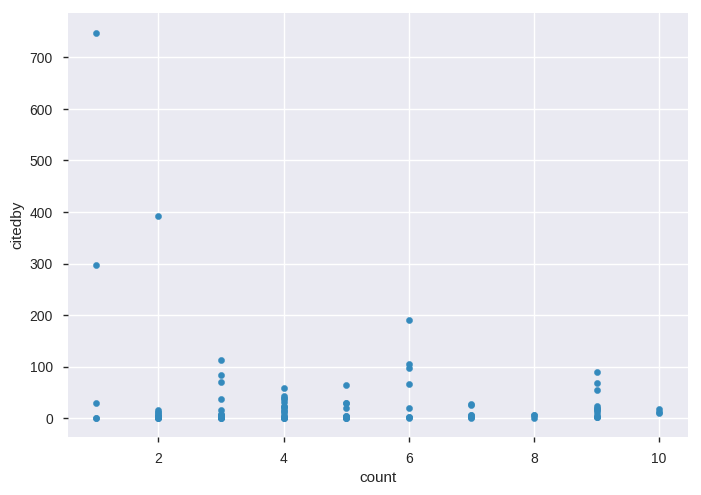

In [0]:
n2.plot(kind="scatter", x="count", y="citedby")

## Profile data

In [0]:
pandas_profiling.ProfileReport(dataframe)

Number of variables,10
Number of observations,143
Total Missing (%),10.4%
Total size in memory,10.3 KiB
Average record size in memory,73.6 B
Numeric,1
Categorical,4
Boolean,0
Date,0
Text (Unique),3
Rejected,2
